# 1. Simple Linear Regression

In [198]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [199]:
data = pd.DataFrame({'age':[25 , 30 , 35 , 40, 45 , 50 , 53 , 55, 59 , 61 , 64 , 66 , 69 , 71],
                    'premium':[20000 , 25000 , 28000 , 30000 , 33000 , 38000 , 41000 , 43000 , 48000 , 50000, 51000 , 55000 , 58000 , 62000]})
data

,age,premium
0,25,20000
1,30,25000
2,35,28000
3,40,30000
4,45,33000
5,50,38000
6,53,41000
7,55,43000
8,59,48000
9,61,50000


<Figure size 500x300 with 0 Axes>

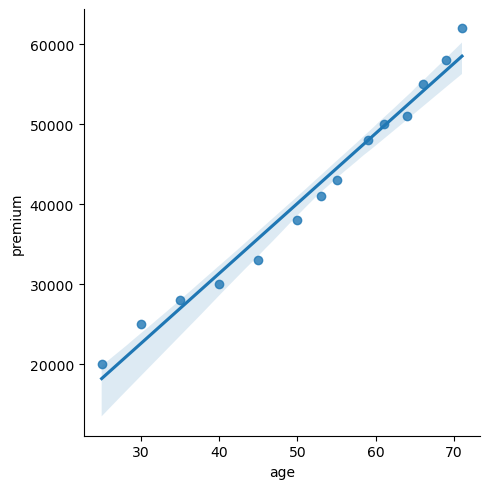

In [200]:
plt.figure(figsize=(5,3))
sns.lmplot(x='age', y='premium' , data = data)
plt.show()

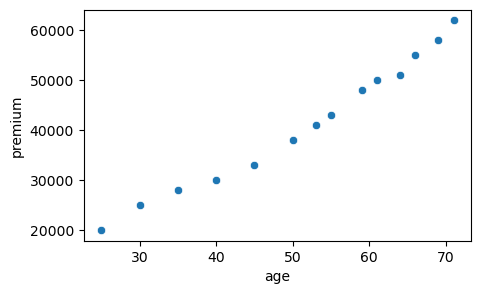

In [201]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='age', y='premium' , data = data)
plt.show()

In [202]:
x = data[['age']]   #-----------> Input (Independent variable)
y = data['premium'] #-----------> Outpcomes (dependent variable)

In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [204]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state = 63)

In [205]:
lr = LinearRegression()

In [206]:
lr.fit(x_train,y_train)

LinearRegression()

In [207]:
lr.predict([[75]]) 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([62717.08185053])

In [208]:
lr.score(x_train,y_train)*100  # Predicted accurecy value in %

98.42775739407371

In [209]:
# y = mx + C   (Simple linear regression)

# y = Outcomes/dependent variable
# m = coefficient/slop
# x = input/independent variable
# c = intercept

In [210]:
lr.coef_

array([884.34163701])

In [211]:
lr.intercept_

-3608.540925266898

In [212]:
# y = 884.34163701*x-3608.540925266898

In [213]:
884.34163701*75-3608.540925266898  # # y = mx + C V/S lr.predict([[75]])  Proved.....

62717.081850483104

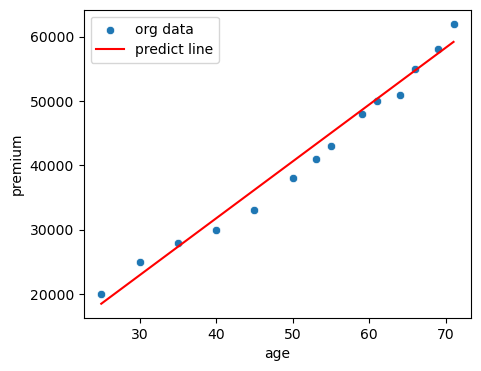

In [214]:
y_prd = lr.predict(x)
plt.figure(figsize=(5,4))
sns.scatterplot(x="age",y="premium", data=data)
plt.plot(data["age"],y_prd, c="red")
plt.legend(["org data", "predict line"])
# plt.savefig("predict.jpg")  for saving image...
plt.show()

# 2. Multiple Linear Regression

In [216]:
path = r"https://drive.google.com/uc?export=download&id=1xxDtrZKfuWQfl-6KA9XEd_eatitNPnkB" 
data1 = pd.read_csv(path)

In [217]:
data1.shape

(7120, 108)

In [218]:
data1.head(3)

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [219]:
data1 = data1[['total_sqft_int','bhk','price']]

In [220]:
data1.head()

,total_sqft_int,bhk,price
0,1672.0,3,150.0
1,1750.0,3,149.0
2,1750.0,3,150.0
3,1250.0,2,40.0
4,1200.0,2,83.0


In [221]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_sqft_int  7120 non-null   float64
 1   bhk             7120 non-null   int64  
 2   price           7120 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 167.0 KB


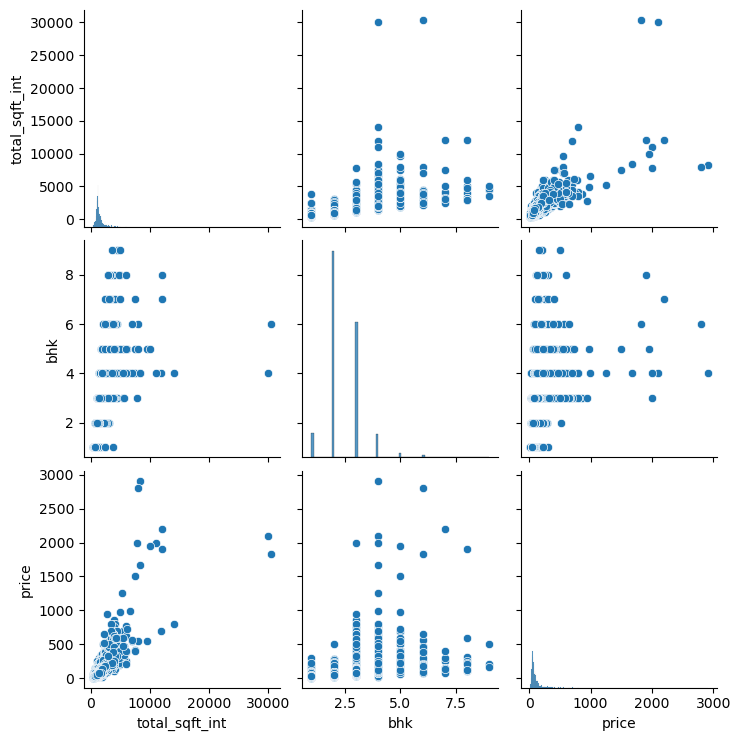

In [222]:
sns.pairplot(data=data1)  # Show linear relationship between two columns..
plt.show()

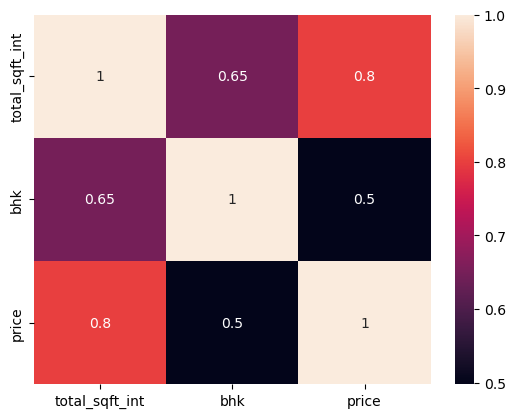

In [223]:
sns.heatmap(data=data1.corr(),annot=True)
plt.show()

In [224]:
data1.shape

(7120, 3)

In [225]:
x = data1.iloc[:,1:]
y = data1["price"]

In [226]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=51)

In [227]:
"""### Feature Scaling"""
 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [228]:
lr1 = LinearRegression()

In [229]:
lr1.fit(x_train,y_train)

LinearRegression()

In [230]:
lr1.score(x_train,y_train)*100

100.0

In [231]:
# y = m1x1 + m2x2 + m3x3....n + c

In [240]:
lr1.coef_  # m1 = -2.16914053e-13 , m2 = 1.08805557e+02

array([-2.16914053e-13,  1.08805557e+02])

In [239]:
lr1.intercept_  # c = 95.08027299859553

95.08027299859553

In [234]:
lr1.predict(x_test)

array([ 80.,  40., 120., ...,  32.,  63., 180.])

In [235]:
x_test[0, :]  #0 rows, : all columns.

#Info of single house.

array([ 0.65677518, -0.13859837])

In [238]:
#Predict of one house.
 
lr1.predict([x_test[0, :]]) # if we increase 0 index then also will be increase houses.
#this value tell us that you can buy and sales house in Lakhs.

array([80.])

In [237]:
#To copmare value true or not.
 
y_test

#This output compare between lr1.predict(x_test) values and y_test values house prices in lakhs.

2435     80.00
3113     40.00
426     120.00
1124     79.00
1161     45.00
         ...  
2078     28.34
6855     84.00
4381     32.00
3862     63.00
43      180.00
Name: price, Length: 1424, dtype: float64